# Problem Definition

In [1]:
#IMPORTING LIBRARIES:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("avocado.csv")
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# Data Analysis

In [3]:
data.shape
#To find the shape of dataset

(18249, 14)

In [4]:
data.columns
#Number of columns...

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.isnull().sum()
#Che

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.dtypes
#Checking the types of data..

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
data['Year'],data['month'],data['day']=data['Date'].str.split('-').str
#Splitting Date into three different columns

In [9]:
data['Year']=data['Year'].astype(int)
data['month']=data['month'].astype(int)
data['day']=data['day'].astype(int)

In [10]:
data.drop(['year','Date'],axis=1,inplace=True)

In [11]:
data.drop('Unnamed: 0',inplace=True,axis=1)
#Since its like a serial number we no need this column which disturb our focus..

In [12]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [13]:
data.skew()
#Checking skewness...

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
month            0.106617
day              0.014310
dtype: float64

<AxesSubplot:>

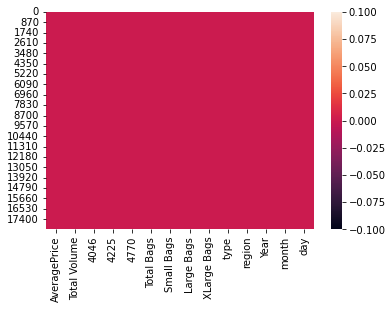

In [14]:
sns.heatmap(data.isnull())

# EDA

# Visualisation 

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

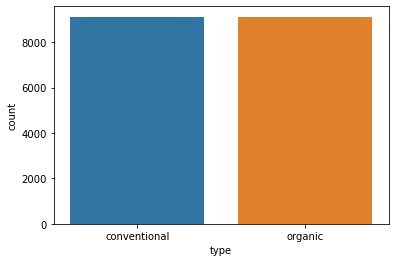

In [15]:
print(data['type'].value_counts())
sns.countplot(x='type',data=data)

In [16]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

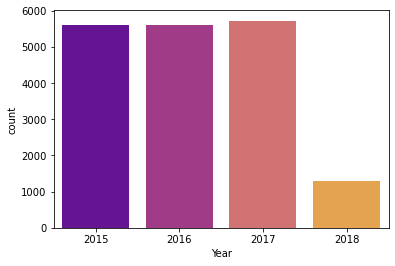

In [17]:
print(data['Year'].value_counts())
sns.countplot(x='Year',data=data,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

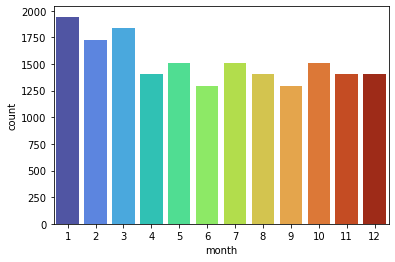

In [18]:
print(data['month'].value_counts())
sns.countplot(x='month',data=data,palette='turbo')

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

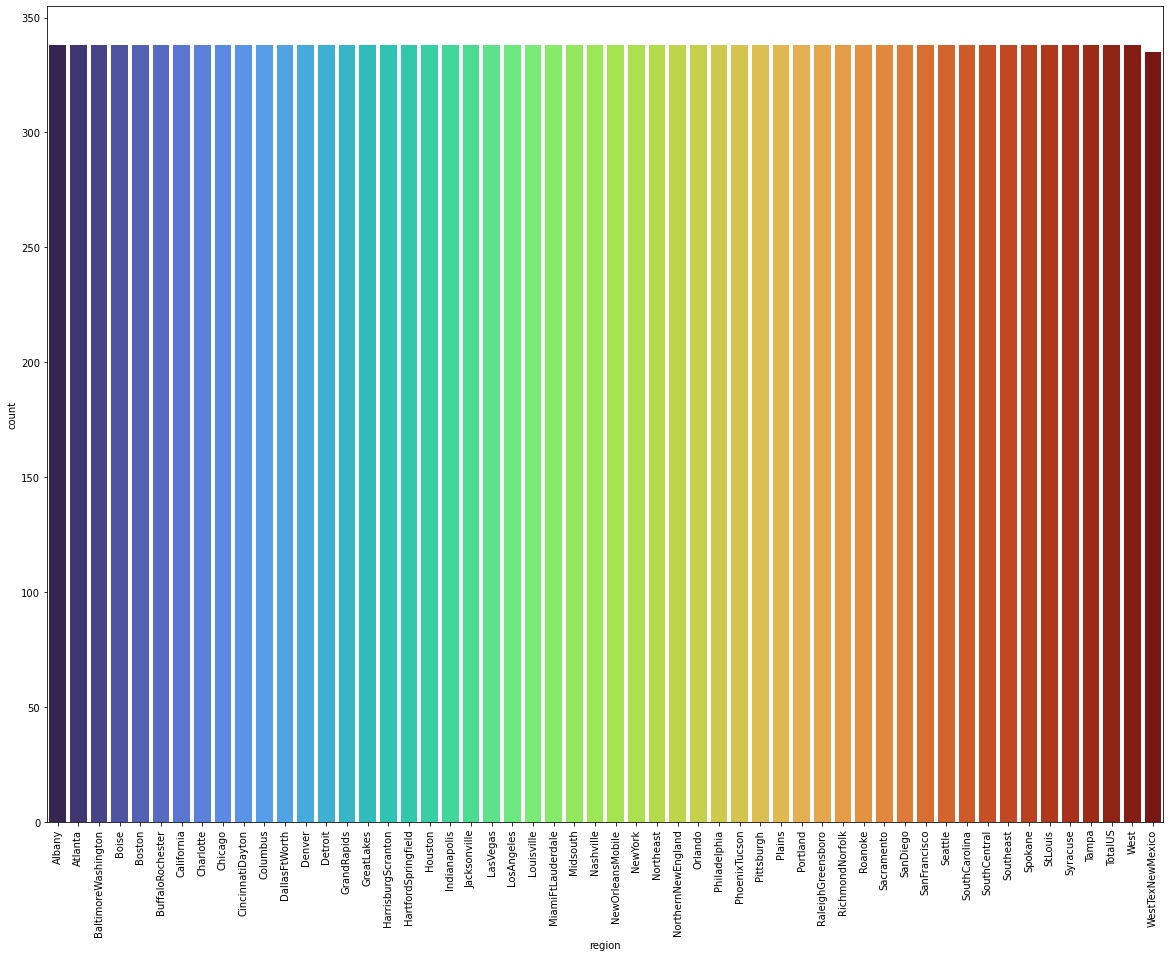

In [19]:
print(data['region'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=data,palette='turbo')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x720 with 0 Axes>

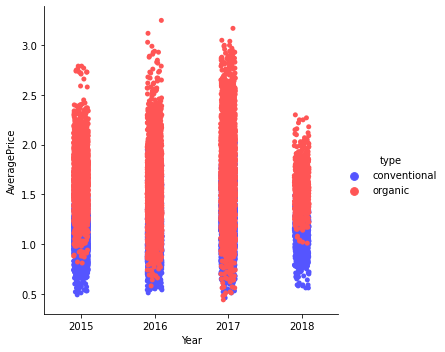

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=data, palette="seismic")
plt.show()

<Figure size 1080x720 with 0 Axes>

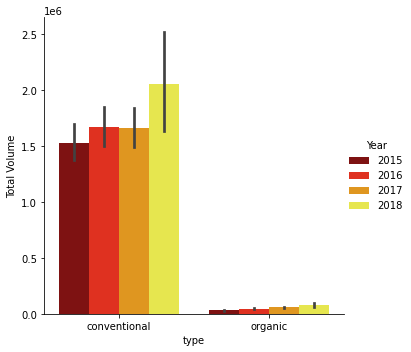

In [21]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=data, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

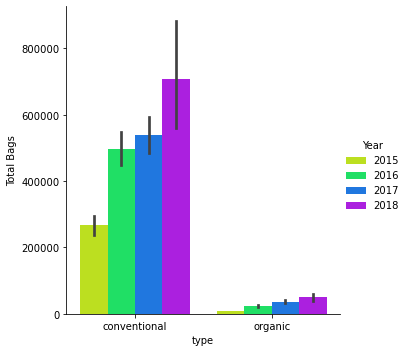

In [22]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=data, kind="bar", palette="hsv")
plt.show()

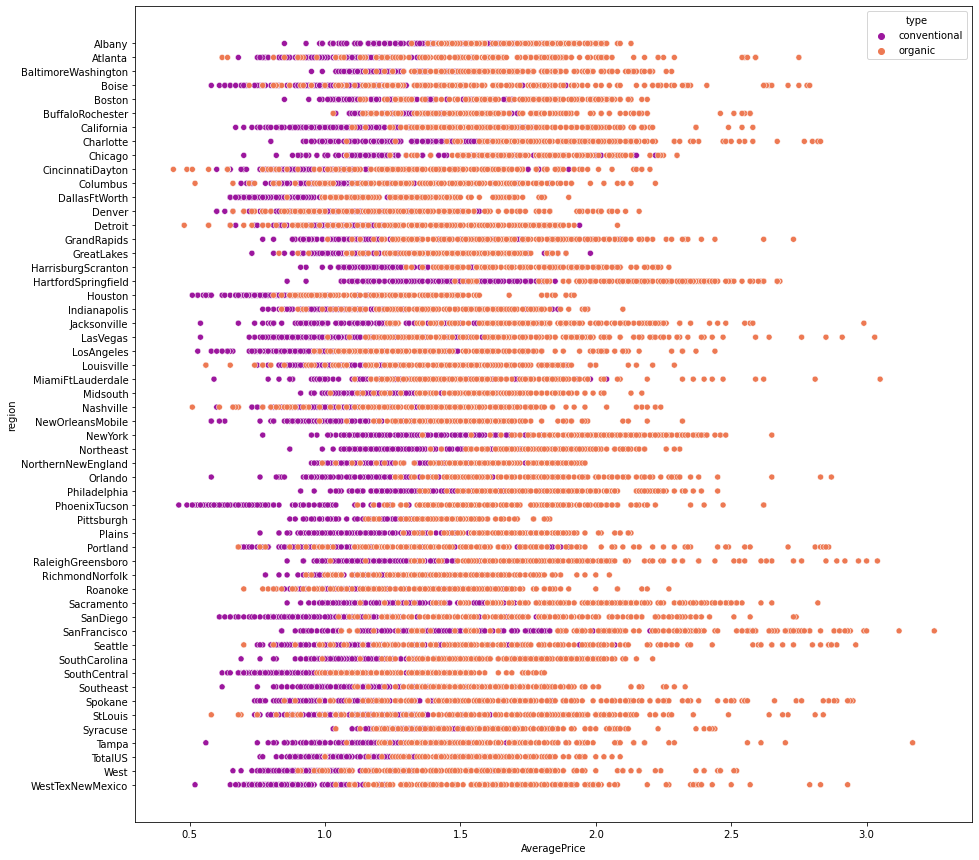

In [23]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=data, palette="plasma")
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

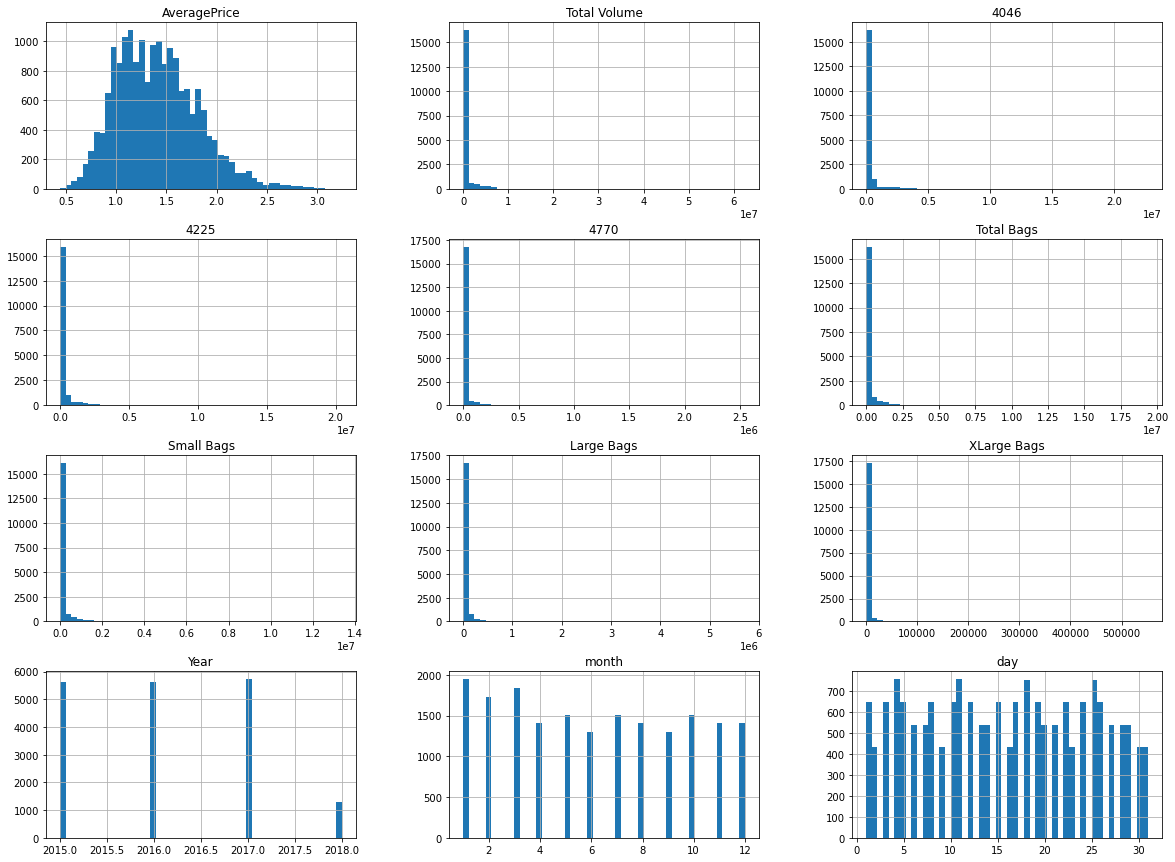

In [24]:
data.hist(bins=50, figsize=(20,15))

In [25]:
data.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
3936,0.81,379464.47,143900.70,110596.26,6531.44,118436.07,44934.52,73501.55,0.0,conventional,LasVegas,2016,4,17
6710,1.13,268808.12,155607.42,26574.54,224.12,86402.04,33910.30,52241.74,250.0,conventional,Jacksonville,2017,5,7
15701,1.56,24963.18,5928.62,75.49,0.00,18959.07,18955.74,3.33,0.0,organic,Houston,2017,11,19
3625,1.05,3126127.34,497880.34,1454195.66,299669.72,874381.62,628085.89,225792.03,20503.7,conventional,GreatLakes,2016,4,10
2195,1.58,564456.60,106180.64,351965.39,33512.19,72798.38,72030.82,735.56,32.0,conventional,SanFrancisco,2015,10,11
15903,1.34,10312.75,1117.76,3189.79,0.00,6005.20,5992.65,12.55,0.0,organic,LasVegas,2017,1,22
13717,1.53,5272.87,927.16,127.76,0.00,4217.95,4183.42,34.53,0.0,organic,Pittsburgh,2016,9,4
17102,1.61,14897.51,567.58,4048.33,139.47,10142.13,7496.73,2645.40,0.0,organic,SouthCarolina,2017,6,11
4183,1.07,196773.62,90032.00,33912.54,220.24,72608.84,63132.79,9476.05,0.0,conventional,Nashville,2016,7,17
17831,1.22,15216.33,341.99,3553.23,0.00,11298.11,8448.16,2849.95,0.0,organic,Indianapolis,2018,3,11


# DATA PREPROCESSING

# Corelation

<function matplotlib.pyplot.show(close=None, block=None)>

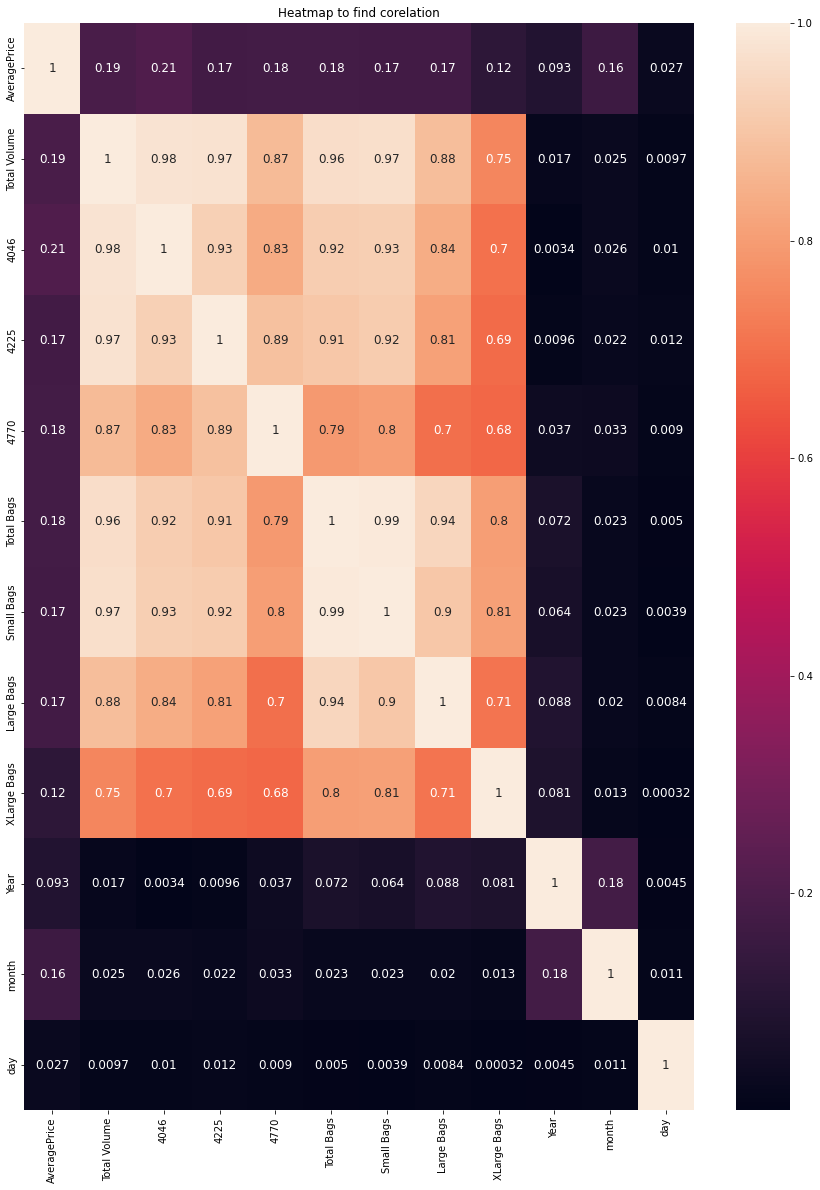

In [26]:
corr=data.corr().abs()
plt.figure(figsize=(15,20))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show

In [27]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


In [28]:
data.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
#Dropping these columns since they arte highly corealted...

In [29]:
data.head(5)

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29


In [30]:
data.shape

(18249, 8)

In [31]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
Total Bags      0
type            0
region          0
Year            0
month           0
day             0
dtype: int64

# Encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
Ord_Enc=OrdinalEncoder()
data['type']=Ord_Enc.fit_transform(data['type'].values.reshape(-1,1))
data['region']=Ord_Enc.fit_transform(data['region'].values.reshape(-1,1))
data
#Changing the data type of type and region (obj ===> numerical)datas..

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


# outliers

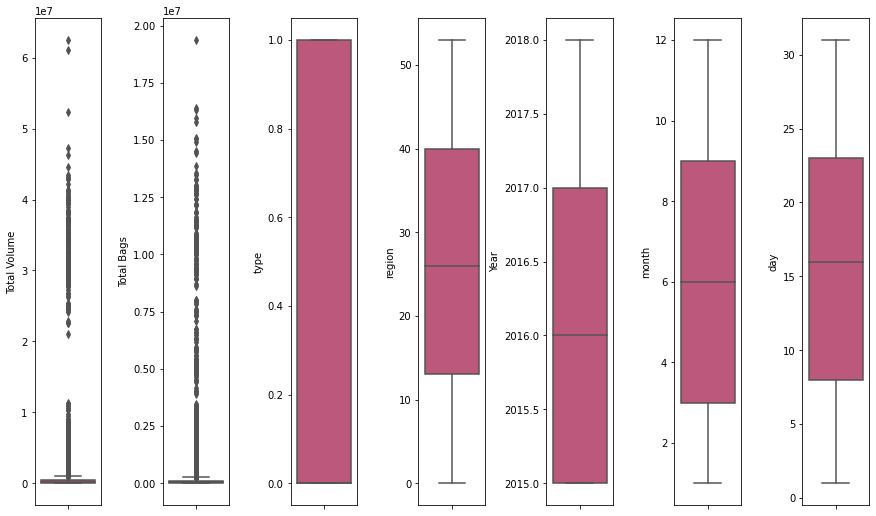

In [34]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = data.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=data, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,1.464959,0.189449


In [36]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [37]:
data

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


In [38]:
abc=data[(z<3).all(axis=1)]

In [39]:
data.shape,abc.shape

((18249, 8), (17931, 8))

In [40]:
(18249-17931)/18249*100

1.7425612362321221

# Skewness

# 

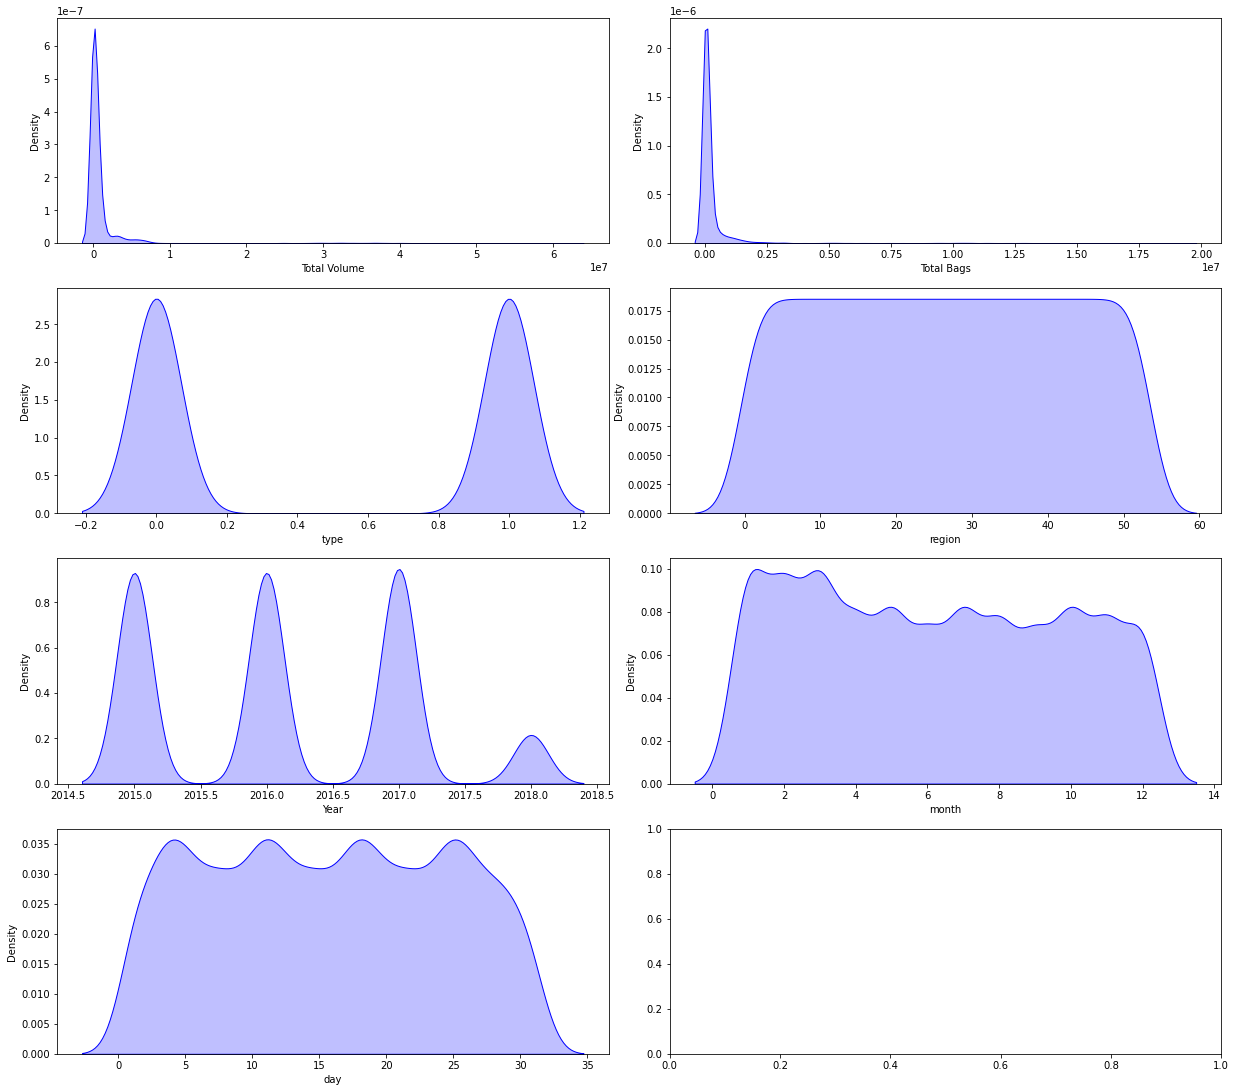

In [41]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(17,15))
index = 0
features = data.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="blue", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Log transform method

In [42]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [43]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [44]:
#Splitting into X and Y..
X=data.drop('AveragePrice',axis=1)
Y=data['AveragePrice']

In [45]:
X.head()

,Total Volume,Total Bags,type,region,Year,month,day
0,11.070344,9.070833,0.0,0.0,2015,12,27
1,10.912867,9.159737,0.0,0.0,2015,12,20
2,11.680313,9.005325,0.0,0.0,2015,12,13
3,11.277116,8.667708,0.0,0.0,2015,12,6
4,10.840377,8.729874,0.0,0.0,2015,11,29


# standard Scaler

In [46]:
X_scaled=StandardScaler()
df=pd.DataFrame(X_scaled.fit_transform(X), columns=X.columns)
df

,Total Volume,Total Bags,type,region,Year,month,day
0,-0.107282,-0.494074,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.175949,-0.454761,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,0.158690,-0.523041,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,-0.017121,-0.672335,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.207558,-0.644845,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...
18244,-0.685006,-0.299689,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,-0.775077,-0.466102,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,-0.778901,-0.459975,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,-0.707798,-0.391424,1.000164,1.700811,1.970504,-1.464959,-0.189449


In [47]:
X

,Total Volume,Total Bags,type,region,Year,month,day
0,11.070344,9.070833,0.0,0.0,2015,12,27
1,10.912867,9.159737,0.0,0.0,2015,12,20
2,11.680313,9.005325,0.0,0.0,2015,12,13
3,11.277116,8.667708,0.0,0.0,2015,12,6
4,10.840377,8.729874,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...
18244,9.745419,9.510421,1.0,53.0,2018,2,4
18245,9.538855,9.134090,1.0,53.0,2018,1,28
18246,9.530085,9.147945,1.0,53.0,2018,1,21
18247,9.693150,9.302969,1.0,53.0,2018,1,14


In [48]:
x=df

# VIF

In [49]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(df,i) for i in range(df.shape[1])]

In [50]:
vif

,vif
0,11.541953
1,9.606831
2,2.846780
3,1.035978
4,1.259762
5,1.045992
6,1.000484


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Random State

In [52]:
#Finding r2 score using train and test..
max_Acc = 0
max_RS = 0
for i in range(1,200):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30, random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, Y_train)
    pred = lin_reg.predict(x_test)
    acc=r2_score(Y_test, pred)
    if acc>max_Acc:
        max_Acc=acc
        max_RS=i
print("Maximum r2 score is ",max_Acc," on Random_state ",max_RS)

Maximum r2 score is  0.5133885878588922  on Random_state  79


# Train and Test

In [53]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=.30,random_state=max_RS)
#Making a new train and test..

# BUILDING MODEL

# LINEAR REGRESSION

In [54]:
# Checking r2score for Linear Regression
Lin_Reg = LinearRegression()
Lin_Reg.fit(x_train,Y_train)

LinearRegression()

In [55]:
# prediction
predLin_Reg=Lin_Reg.predict(x_test)
print('R2_score:',r2_score(Y_test,predLin_Reg))

R2_score: 0.5133885878588922


In [56]:
# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(Y_test, predLin_Reg))

MAE: 0.09192876069565604


In [57]:
# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(Y_test, predLin_Reg))

MSE: 0.013416433720890252


In [58]:
# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predLin_Reg)))

RMSE: 0.1158293301409028


In [59]:
# Checking cv score for Linear Regression
print(cross_val_score(Lin_Reg,x,Y,cv=5).mean())

0.14362453555163893


# lasso Regressor

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [61]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,Y_train)
lasso.score(x_train,Y_train)
pred_lasso=lasso.predict(x_test)

print('R2_Score:',r2_score(Y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(Y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))

R2_Score: -0.001629648770546499
MAE: 0.13616330002741808
MSE: 0.027616076113956358
RMSE: 0.1661808536322893


In [62]:
# Checking cv score for Lasso Regression
print(cross_val_score(lasso,x,Y,cv=5).mean())

-1.0377105535400972


# RIDGE REGRESSOR

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [64]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10.26], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 0.1, 'solver': 'saga'}


In [65]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,Y_train)
ridge.score(x_train,Y_train)
pred_ridge=ridge.predict(x_test)

print('R2_Score:',r2_score(Y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(Y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))

R2_Score: 0.513287043482467
MAE: 0.09193862769176296
MSE: 0.013419233415599512
RMSE: 0.11584141494128736


In [66]:
# Checking cv score for Ridge Regression
print(cross_val_score(ridge,x,Y,cv=5).mean())

0.14403312897276171


In [67]:
from sklearn.linear_model import SGDRegressor

# SGD REgressor

In [68]:
# Checking R2 score for Stochastic Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,Y_train)

SGDRegressor()

In [69]:
# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(Y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(Y_test, predSGD))
print('MSE:',metrics.mean_squared_error(Y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predSGD)))

R2_Score: 0.5108070010981423
MAE: 0.09213813544687992
MSE: 0.013487611023366432
RMSE: 0.11613617448222768


In [70]:
# Checking cv score for SGD Regression
print(cross_val_score(SGD,x,Y,cv=5).mean())

0.14174859597248562


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor


# AdaBoostRegressor

In [72]:
Ada_Boo = AdaBoostRegressor()
Ada_Boo.fit(x_train,Y_train)

AdaBoostRegressor()

In [73]:
# prediction
predAda_Boo=Ada_Boo.predict(x_test)
print('R2_Score:',r2_score(Y_test,predAda_Boo))
print('MAE:',metrics.mean_absolute_error(Y_test, predAda_Boo))
print('MSE:',metrics.mean_squared_error(Y_test, predAda_Boo))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predAda_Boo)))

R2_Score: 0.556222880289815
MAE: 0.08855239964416058
MSE: 0.012235443240514794
RMSE: 0.11061393782211532


In [74]:
# Checking cv score for AdaBosst Regressor
print(cross_val_score(Ada_Boo,x,Y,cv=5).mean())

0.059144697386075376


In [75]:
Dec_Tre=DecisionTreeRegressor()
Dec_Tre.fit(x_train,Y_train)

DecisionTreeRegressor()

In [76]:
# prediction
predDec_Tre=Dec_Tre.predict(x_test)
print('R2_Score:',r2_score(Y_test,predDec_Tre))
print('MAE:',metrics.mean_absolute_error(Y_test, predDec_Tre))
print('MSE:',metrics.mean_squared_error(Y_test, predDec_Tre))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predDec_Tre)))

R2_Score: 0.7629929387885971
MAE: 0.053647848506749043
MSE: 0.006534556010790166
RMSE: 0.08083660068799384


In [77]:
# Checking cv score for DecisionTree
print(cross_val_score(Dec_Tre,x,Y,cv=5).mean())

-0.1708882160836507


# RandomforestRegressor

In [78]:
Ran_For=RandomForestRegressor()
Ran_For.fit(x_train,Y_train)

RandomForestRegressor()

In [79]:
# prediction
predRan_For=Ran_For.predict(x_test)
print('R2_Score:',r2_score(Y_test,predRan_For))
print('MAE:',metrics.mean_absolute_error(Y_test, predRan_For))
print('MSE:',metrics.mean_squared_error(Y_test, predRan_For))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predRan_For)))

R2_Score: 0.8893764214223859
MAE: 0.039846828598686955
MSE: 0.0030500187067620038
RMSE: 0.05522697444874202


In [80]:
# Checking cv score for RandomForest Regressor
print(cross_val_score(Ran_For,x,Y,cv=5).mean())

0.11251069916774228


# Conclusion
         

# CATEGORICAL

In [81]:
ava=pd.read_csv("avocado.csv")
ava.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [82]:
ava['region'].nunique()

54

# outliers

# EDA

In [83]:
abc= ava.select_dtypes(np.number)
abc

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [84]:
abc.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Unnamed: 0          AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

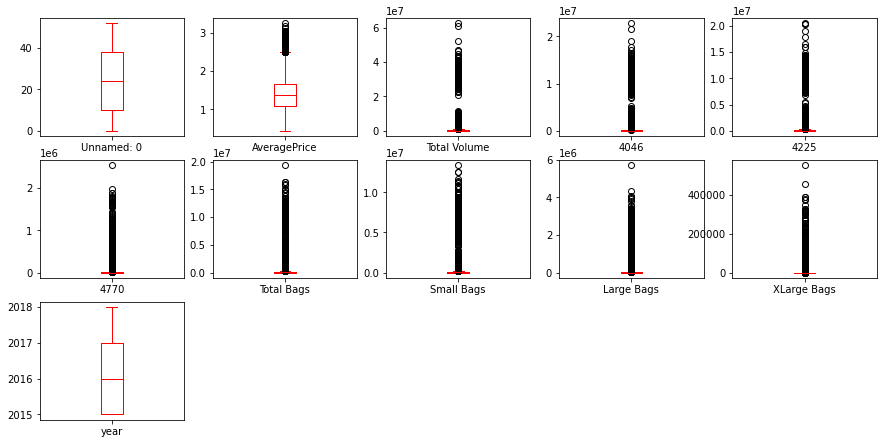

In [85]:
ava.plot(kind='box', subplots=True, layout=(4,5),figsize=(15,10),color='red')

In [86]:
#Z SCORE
from scipy.stats import zscore
z=np.abs(zscore(abc))
print(z)

       Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0        1.565327      0.188689      0.227716  0.230816  0.199902  0.212091   
1        1.500730      0.139020      0.230427  0.231103  0.208054  0.211997   
2        1.436133      1.182069      0.212085  0.231007  0.154478  0.211325   
3        1.371536      0.809551      0.223444  0.230741  0.185350  0.211864   
4        1.306939      0.312861      0.231538  0.230891  0.208719  0.211834   
...           ...           ...           ...       ...       ...       ...   
18244    1.113149      0.556347      0.241373  0.230017  0.243857  0.212540   
18245    1.048552      0.755023      0.242296  0.230693  0.242277  0.212540   
18246    0.983955      1.152375      0.242331  0.230693  0.243090  0.205766   
18247    0.919358      1.301382      0.241625  0.230428  0.242651  0.205774   
18248    0.854761      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge B

In [87]:
threshold=3
print(np.where(z<3))
print(abc.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [88]:
data= ava[(z<3).all(axis=1)]

In [89]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [90]:
data.shape

(17651, 14)

In [91]:
ava.shape,data.shape

((18249, 14), (17651, 14))

In [92]:
ava.shape[0]- data.shape[0]

598

In [93]:
data.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

In [94]:
data.shape

(17651, 14)

In [95]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [96]:
data.drop('Date',axis=1,inplace=True)

In [97]:
data.shape

(17651, 13)

In [98]:
abc=data.select_dtypes(np.number)
abc

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


# DataPreprocessing

# Power Transformer

In [99]:
from sklearn.preprocessing import power_transform
transformed=power_transform(abc)

In [100]:
transformed=pd.DataFrame(transformed)
transformed.columns= abc.columns

In [101]:
transformed

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.966939,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647
1,-1.790941,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647
2,-1.646881,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647
3,-1.520296,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210647
4,-1.405299,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210647
...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.104106,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978707
17647,-1.013819,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978707
17648,-0.927266,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978707
17649,-0.843939,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978707


In [102]:
    transformed.skew()

Unnamed: 0     -0.243656
AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
dtype: float64

In [103]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(transformed)

In [104]:
scaled= pd.DataFrame(scaled)
scaled.columns= transformed.columns
scaled

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.966939,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618
1,-1.790941,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618
2,-1.646881,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618
3,-1.520296,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618
4,-1.405299,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618
...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.104106,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735
17647,-1.013819,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735
17648,-0.927266,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735
17649,-0.843939,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735


# pca

In [105]:
from sklearn.decomposition import PCA
pca= PCA()

In [106]:
principal_component=pca.fit_transform(scaled)

In [107]:
pca=PCA(n_components=8)

In [108]:
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [109]:
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.967798,0.100835,2.331533,0.346627,0.265112,0.354141,0.422810,-0.279533
1,-1.033341,0.030345,2.182465,0.283178,0.257918,0.322961,0.506727,-0.366422
2,-0.415771,-0.454304,2.102318,1.016091,-0.087570,0.703136,0.858514,-0.212473
3,-0.769873,-0.403801,1.992048,0.776570,0.011502,0.441945,0.606069,-0.101180
4,-1.034706,-0.285092,1.881941,0.426670,0.177688,0.172503,0.523632,-0.151290
...,...,...,...,...,...,...,...,...
17646,-1.730663,2.320781,-0.495365,0.379012,0.221053,0.651063,-0.298031,0.133308
17647,-1.918360,2.271830,-0.525732,0.159897,0.251778,0.502270,-0.169253,0.165267
17648,-1.610036,2.067548,-0.286857,-0.692303,0.155072,0.647050,0.906404,0.896741
17649,-1.509525,2.056356,-0.345907,-0.819426,0.260638,0.615858,0.834057,0.878391


In [110]:
cat=pd.get_dummies(data['type'])

In [111]:
principal_x.shape , cat.shape

((17651, 8), (17651, 2))

In [112]:
pd.concat([principal_x,cat],axis=1,join='inner')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,conventional,organic
0,-0.967798,0.100835,2.331533,0.346627,0.265112,0.354141,0.422810,-0.279533,1,0
1,-1.033341,0.030345,2.182465,0.283178,0.257918,0.322961,0.506727,-0.366422,1,0
2,-0.415771,-0.454304,2.102318,1.016091,-0.087570,0.703136,0.858514,-0.212473,1,0
3,-0.769873,-0.403801,1.992048,0.776570,0.011502,0.441945,0.606069,-0.101180,1,0
4,-1.034706,-0.285092,1.881941,0.426670,0.177688,0.172503,0.523632,-0.151290,1,0
...,...,...,...,...,...,...,...,...,...,...
17646,-1.730663,2.320781,-0.495365,0.379012,0.221053,0.651063,-0.298031,0.133308,0,1
17647,-1.918360,2.271830,-0.525732,0.159897,0.251778,0.502270,-0.169253,0.165267,0,1
17648,-1.610036,2.067548,-0.286857,-0.692303,0.155072,0.647050,0.906404,0.896741,0,1
17649,-1.509525,2.056356,-0.345907,-0.819426,0.260638,0.615858,0.834057,0.878391,0,1


In [113]:
principal_x['type']= data['type']
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,type
0,-0.967798,0.100835,2.331533,0.346627,0.265112,0.354141,0.422810,-0.279533,conventional
1,-1.033341,0.030345,2.182465,0.283178,0.257918,0.322961,0.506727,-0.366422,conventional
2,-0.415771,-0.454304,2.102318,1.016091,-0.087570,0.703136,0.858514,-0.212473,conventional
3,-0.769873,-0.403801,1.992048,0.776570,0.011502,0.441945,0.606069,-0.101180,conventional
4,-1.034706,-0.285092,1.881941,0.426670,0.177688,0.172503,0.523632,-0.151290,conventional
...,...,...,...,...,...,...,...,...,...
17646,-1.730663,2.320781,-0.495365,0.379012,0.221053,0.651063,-0.298031,0.133308,organic
17647,-1.918360,2.271830,-0.525732,0.159897,0.251778,0.502270,-0.169253,0.165267,organic
17648,-1.610036,2.067548,-0.286857,-0.692303,0.155072,0.647050,0.906404,0.896741,organic
17649,-1.509525,2.056356,-0.345907,-0.819426,0.260638,0.615858,0.834057,0.878391,organic


In [114]:
X=pd.get_dummies(principal_x)
X.shape

(17651, 10)

# LabelEncoder

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le=LabelEncoder()
Y=le.fit_transform(data['region'])

In [117]:
Y.shape

(17651,)

In [118]:
pd.DataFrame(Y,columns=['region']).value_counts()

region
0         338
16        338
49        338
44        338
39        338
38        338
35        338
34        338
32        338
30        338
26        338
23        338
19        338
18        338
27        338
10        338
2         338
8         338
9         338
5         338
11        338
4         338
12        338
13        338
20        337
1         337
28        337
50        336
33        336
14        336
41        336
40        336
24        335
31        335
21        333
25        333
48        333
7         332
53        332
22        331
17        331
36        330
3         329
37        328
47        328
43        326
29        325
46        307
42        301
45        292
6         290
15        272
52        256
51        169
dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [120]:
maxaccu=0
maxRS=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.3936561880487114 on Random State = 8


In [121]:
log_reg=LogisticRegression()

In [122]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [123]:
Y_pred=log_reg.predict(x_test)
Y_pred
#Making Predictions..

array([33, 26, 40, ..., 16, 27, 26])

In [124]:
accuracy=accuracy_score(y_test,Y_pred)
accuracy

0.3919569527046163

In [125]:
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
scaled

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.966939,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618
1,-1.790941,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618
2,-1.646881,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618
3,-1.520296,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618
4,-1.405299,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618
...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.104106,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735
17647,-1.013819,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735
17648,-0.927266,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735
17649,-0.843939,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735


In [127]:
scaled['type']= data['type']
scaled

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type
0,-1.966939,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618,conventional
1,-1.790941,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618,conventional
2,-1.646881,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618,conventional
3,-1.520296,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618,conventional
4,-1.405299,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618,conventional
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.104106,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735,organic
17647,-1.013819,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735,organic
17648,-0.927266,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735,organic
17649,-0.843939,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735,organic


In [128]:
input_data=pd.get_dummies(scaled)

In [129]:
input_data.shape

(17651, 13)

In [130]:
Y.shape

(17651,)

In [131]:
maxaccu=0
maxRS=0

for i in range(0,10):
    x_train,x_test,y_train,y_test= train_test_split(input_data,Y,random_state=i,test_size=.33)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.4944206008583691 on Random State = 2


# building Model

In [134]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier


In [135]:
LR_model= LogisticRegression()

DT_model= DecisionTreeClassifier()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()

Bag_model=BaggingClassifier()
model=[LR_model,DT_model,KNR_model,RFR_model,Bag_model ]


In [136]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 48.66952789699571
Confusion Matrix of  LogisticRegression()  is 
 [[44  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  3  1]
 [ 0  0  0 ...  1 72  0]
 [ 1  0  2 ...  0  0 31]]
              precision    recall  f1-score   support

           0       0.46      0.45      0.46        97
           1       0.20      0.24      0.22       120
           2       0.65      0.59      0.62       114
           3       0.51      0.54      0.52        99
           4       0.39      0.35      0.37       122
           5       0.45      0.41      0.43       113
           6       0.68      0.74      0.71       103
           7       0.55      0.62      0.58       112
           8       0.50      0.69      0.58        98
           9       0.53      0.78      0.63       108
          10       0.45      0.36      0.40       118
          11       0.57      0.58      0.58       115
          12       0.38      0.4

In [147]:
import joblib

In [150]:
joblib.dump(RFR_model,"Avacado_analyse.pkl")

['Avacado_analyse.pkl']

#                                                           Thank You